In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pprint import pprint
from pathlib import Path

# File locations
survey_2016 = "resources/2016-cleaned.csv"

# Reading the data
clean_2016_df = pd.read_csv(survey_2016)


In [2]:
age_req_time_off_df=clean_2016_df[['age','request_med_leave']]
age_req_time_off_df.head()

,age,request_med_leave
0,39,Very easy
1,29,Somewhat easy
2,38,Neither easy nor difficult
3,43,No Response
4,43,Neither easy nor difficult


In [3]:
age_req_time_off_df = age_req_time_off_df[(age_req_time_off_df['age'] < 80) & (age_req_time_off_df['age'] > 15)]


In [4]:

def potential_outliers(pd_series, column_name):
    series_avg=pd_series.mean
    q1 = pd_series.quantile(0.25)
    q3 = pd_series.quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    outliers = pd_series[(pd_series < lower_bound) | (pd_series > upper_bound)]
    print(f"{column_name}'s potential outliers: {outliers}")



request_med_leave_result=["Very easy","Somewhat easy", "Neither easy nor difficult", "Very difficult", "I don't know", "No Response"]

# Create empty list to fill with tumor vol data (for plotting)
ver_ez=[]
sw_ez=[]
nez_norh=[]
very_diff=[]
idk=[]
nr=[]

for index, row in age_req_time_off_df.iterrows():
    if row["request_med_leave"] == request_med_leave_result[0]:
        ver_ez.append(row["age"])
    elif row["request_med_leave"] == request_med_leave_result[1]:
        sw_ez.append(row["age"])
    elif row["request_med_leave"] == request_med_leave_result[2]:
        nez_norh.append(row["age"])
    elif row["request_med_leave"] == request_med_leave_result[3]:
        very_diff.append(row["age"])
    elif row["request_med_leave"] == request_med_leave_result[4]:
        idk.append(row["age"])
    elif row["request_med_leave"] == request_med_leave_result[5]:
        nr.append(row["age"])
       

ver_ez_series = pd.Series(ver_ez, name=request_med_leave_result[0])
sw_ez_series = pd.Series(sw_ez, name=request_med_leave_result[1])
nez_norh_ez_series = pd.Series(nez_norh, name=request_med_leave_result[2])
very_diff_series = pd.Series(very_diff, name=request_med_leave_result[3])
idk_series = pd.Series(idk, name=request_med_leave_result[4])
nr_series = pd.Series(nr, name=request_med_leave_result[5])
#

potential_outliers(ver_ez_series,"Very easy") 
potential_outliers(sw_ez_series,"Somewhat easy")
potential_outliers(nez_norh_ez_series,"Neither easy nor difficult")
potential_outliers(very_diff_series,"Very difficult")
potential_outliers(idk_series,"I don't know")
potential_outliers(nr_series,"No Response ")
#sw_ez_series.head()
#print(ver_ez)

Very easy's potential outliers: 29     55
61     55
113    53
123    63
164    52
176    51
Name: Very easy, dtype: int64
Somewhat easy's potential outliers: 99     57
112    55
181    51
257    56
Name: Somewhat easy, dtype: int64
Neither easy nor difficult's potential outliers: 67     61
81     62
94     54
152    70
155    63
Name: Neither easy nor difficult, dtype: int64
Very difficult's potential outliers: 46    59
80    57
86    57
Name: Very difficult, dtype: int64
I don't know's potential outliers: 67    58
Name: I don't know, dtype: int64
No Response 's potential outliers: 46     63
169    65
179    63
Name: No Response, dtype: int64


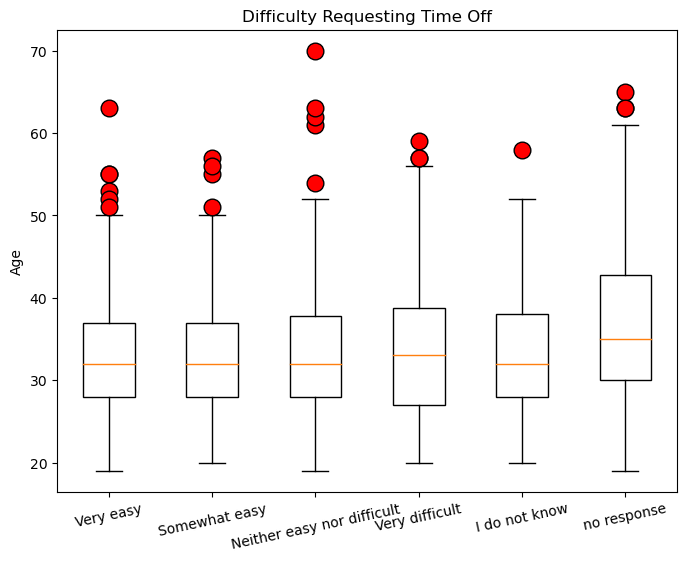

In [5]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8,6))

# Create a boxplot for the desired column with custom colors
columns_to_plot = [ver_ez_series, sw_ez_series, nez_norh_ez_series, very_diff_series,idk_series,nr_series]
flierprops = dict(markerfacecolor='red',markersize=12)
labels = ["Very easy","Somewhat easy", "Neither easy nor difficult", "Very difficult", "I do not know", "no response"]

boxplot = ax.boxplot(columns_to_plot, patch_artist=True,flierprops=flierprops, labels=labels)

for box in boxplot['boxes']:
    box.set(facecolor='white')  # You can change 'white' to the desired color


# Customize the appearance
ax.grid(False)
ax.set_ylabel("Age")
plt.title('Difficulty Requesting Time Off') 
plt.xticks(rotation=12)
plt.savefig('age_diff_req_timeoff.png')
plt.show()